In [138]:
!pip install scikit-learn audiomentations pyroomacoustics

In [489]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 433.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [490]:
import os
from matplotlib import pyplot as plt
import numpy as np
import librosa
import uuid
from tqdm import tqdm

In [399]:
from audiomentations import (
    AddGaussianNoise, 
    AddGaussianSNR, 
    BandPassFilter, 
    Compose, 
    ClippingDistortion, 
    PolarityInversion, 
)

# Processing Functions

In [443]:
def get_melspectrogram_db(file_path, sr=48000, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, sec=5):
    wav,sr = librosa.load(file_path,sr=sr)
    if wav.shape[0]<sec*sr:
        wav=np.pad(wav,int(np.ceil((sec*sr-wav.shape[0])/2)),mode='reflect')
    
    wav=wav[:sec*sr]
    
    spec=librosa.feature.melspectrogram(
        y=wav, sr=sr, n_fft=n_fft,
        hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax
    )
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    
    return spec_db

def spec_to_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    
    spec_scaled = (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.float32)
#     spec_scaled = tf.expand_dims(spec_scaled, axis=2)
    return spec_scaled

def get_spec(wav, sr=48000, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, sec=5):
    wav=wav[:sec*sr]
    
    spec=librosa.feature.melspectrogram(
        y=wav, sr=sr, n_fft=n_fft,
        hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax
    )
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    
    return spec_db

def transform_audio(file_name, sr=48000):
    audio, _ = librosa.load(file_name, sr=sr)
    
    transform = Compose([
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.02, p=0.5),
        AddGaussianSNR(p=0.5),
        ClippingDistortion(p=0.5),
        PolarityInversion(p=0.25),
        BandPassFilter(p=0.25)
    ])
    taudio = transform(audio, sample_rate=sr)
    
    return taudio

def display_audio(filename, sr=48000):
    s = get_melspectrogram_db(filename)
    plt.figure()
    plt.imshow(S)
    plt.show()

In [421]:
BASE_AMAN = os.path.join('data', 'base_aman.wav')
IMRAN = os.path.join('data', 'imran', 'imran.wav')

In [422]:
S = get_melspectrogram_db(IMRAN)

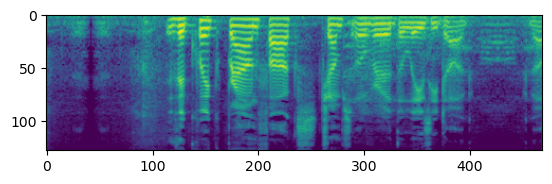

In [423]:
plt.figure()
plt.imshow(S)
plt.show()

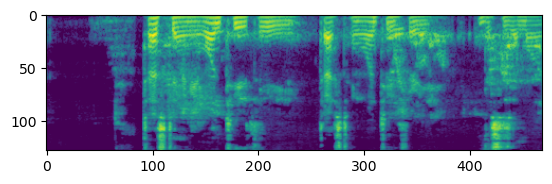

In [403]:
image = spec_to_image(S)
plt.figure()
plt.imshow(image)
plt.show()

In [404]:
S

array([[-49.002144, -51.56331 , -59.763763, ..., -25.628508, -31.114307,
        -21.0659  ],
       [-45.040543, -47.78139 , -59.763763, ..., -11.973267, -14.172678,
        -13.419514],
       [-42.385597, -41.274025, -47.02672 , ...,  -9.359166,  -9.810422,
        -10.886902],
       ...,
       [-59.763763, -59.763763, -59.763763, ..., -53.545166, -56.52403 ,
        -56.952152],
       [-59.763763, -59.763763, -59.763763, ..., -56.826126, -58.819027,
        -57.272453],
       [-59.763763, -59.763763, -59.763763, ..., -50.3694  , -55.05204 ,
        -55.75888 ]], dtype=float32)

In [51]:
image

array([[0.13452025, 0.10250568, 0.        , ..., 0.4266907 , 0.3581182 ,
        0.48372325],
       [0.18404026, 0.14977965, 0.        , ..., 0.5973812 , 0.56988853,
        0.5793031 ],
       [0.21722707, 0.23112172, 0.15921307, ..., 0.63005745, 0.62441677,
        0.6109608 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07773247, 0.04049669,
        0.03514515],
       [0.        , 0.        , 0.        , ..., 0.03672047, 0.01180922,
        0.03114139],
       [0.        , 0.        , 0.        , ..., 0.11742955, 0.05889656,
        0.05006104]], dtype=float32)

In [58]:
from IPython.display import Audio

In [424]:
IPython.display.Audio(IMRAN)

In [341]:
# !pip install 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:009 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.7.3-cp310-cp310-macosx_11_0_arm64.whl size=560703 sha256=3b577903f422bc8ff2994c7f402a95012f9dc0fcfe811f39c92486b1cd550729
  Stored in directory: /Users/amanmibra/Library/Caches/pip/wheels/6b/f3/67/0d0c4c06234c59c14e5ccf72774bd5c5f1b43c3083043c7fb7
Successfully built pyroomacoustics


In [366]:
from audiomentations import PolarityInversion, BandPassFilter, ClippingDistortion, Compose, AddGaussianNoise, AddGaussianSNR, LowPassFilter

In [367]:
audio, _ = librosa.load(BASE_AMAN, sr=48000)

In [368]:
display(Audio(audio, rate=48000))

In [377]:
sr = 48000
transform = Compose([
#     AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.2, p=0.5),
    ClippingDistortion(p=1.0),
    PolarityInversion(p=1.0),
])
taudio = transform(audio, sample_rate=sr)

In [378]:
taudio.shape

(262016,)

In [379]:
audio.shape

(262016,)

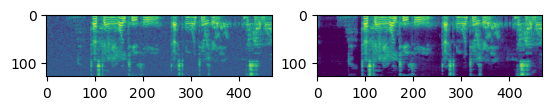

In [412]:
fig = plt.figure()
fig.add_subplot(1,2, 1)
plt.imshow(get_spec(taudio))
fig.add_subplot(1,2, 2)
plt.imshow(S)
plt.show(block=True)

In [413]:
display(Audio(taudio, rate=48000))

In [260]:
get_spec(taudio).shape

(128, 469)

In [261]:
S.shape

(128, 469)

In [411]:
taudio = transform_audio(BASE_AMAN)

In [453]:
labels = os.listdir('data')

In [456]:
labels

['aman', 'imran', 'labib']

In [454]:
assert len(labels) == 3

In [511]:
for label in labels:
    files = os.listdir(os.path.join('data', label))
    for file in files:
        if ".i" in file:
            continue
        filepath = os.path.join('data', label, file)
#         audio, _ = librosa.load(filepath, sr=sr)
        generate_duplicate_wav(filepath, label, augmented=False, num_of_duplicates=100)
        

Generating wav duplicates of wavfile(data/aman/aman_a5aea376310546d8831bf071c14089e9)...: 100%|███████████████████| 100/100 [00:00<00:00, 1275.01it/s]
Generating wav duplicates of wavfile(data/aman/aman_11a1d3d1d0274a3f8dd6b6ea5056c4ef)...: 100%|████████████████████| 100/100 [00:00<00:00, 958.78it/s]
Generating wav duplicates of wavfile(data/aman/aman_93ac4b4ffe944a3da147938d0730729a)...: 100%|███████████████████| 100/100 [00:00<00:00, 1150.01it/s]
Generating wav duplicates of wavfile(data/aman/aman_a5deaed115f04845b8ef2163ba4a9278)...: 100%|███████████████████| 100/100 [00:00<00:00, 1410.24it/s]
Generating wav duplicates of wavfile(data/aman/aman_9f605b3c923c463bb8dc2fe5ce1e36a7)...: 100%|███████████████████| 100/100 [00:00<00:00, 1180.10it/s]
Generating wav duplicates of wavfile(data/aman/aman_96352cb9c16c4499a84ff0887bdbe389)...: 100%|███████████████████| 100/100 [00:00<00:00, 1380.13it/s]
Generating wav duplicates of wavfile(data/aman/aman_cce5636db8284f2fae6c4628adb6c5e9)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_26b0faf23a904150b1679bddd42997ad)...: 100%|███████████████████| 100/100 [00:00<00:00, 1843.15it/s]
Generating wav duplicates of wavfile(data/aman/aman_5a865995f4a84334a6bfc500a79cd7bd)...: 100%|███████████████████| 100/100 [00:00<00:00, 1726.82it/s]
Generating wav duplicates of wavfile(data/aman/aman_5820728759de4ce0a2b7a5f18a9845d2)...: 100%|███████████████████| 100/100 [00:00<00:00, 1605.94it/s]
Generating wav duplicates of wavfile(data/aman/aman_e10901a48c614a36a32e8dc5f3c201bd)...: 100%|███████████████████| 100/100 [00:00<00:00, 1485.31it/s]
Generating wav duplicates of wavfile(data/aman/aman_70b4ec2c8fb2403c9df2e89a4cc99de0)...: 100%|███████████████████| 100/100 [00:00<00:00, 1494.82it/s]
Generating wav duplicates of wavfile(data/aman/aman_38e7a9ebbdd94763888b57c00c2c3bd5)...: 100%|███████████████████| 100/100 [00:00<00:00, 1499.38it/s]
Generating wav duplicates of wavfile(data/aman/aman_356aacf83b12405d8110a0503d0701fe)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_068a14680419481ea4d3dbb23d5446ac)...: 100%|███████████████████| 100/100 [00:00<00:00, 1614.88it/s]
Generating wav duplicates of wavfile(data/aman/aman_567f20879c924301b489745da0b00c34)...: 100%|███████████████████| 100/100 [00:00<00:00, 1466.27it/s]
Generating wav duplicates of wavfile(data/aman/aman_751c70921a414d35a28ed6e08f583098)...: 100%|███████████████████| 100/100 [00:00<00:00, 1361.45it/s]
Generating wav duplicates of wavfile(data/aman/aman_487b61788f094d249d12b3eae78f54b9)...: 100%|███████████████████| 100/100 [00:00<00:00, 1399.00it/s]
Generating wav duplicates of wavfile(data/aman/aman_2e5e38c716974073a787a7d61c81be77)...: 100%|███████████████████| 100/100 [00:00<00:00, 1787.53it/s]
Generating wav duplicates of wavfile(data/aman/aman_d243d2f373484c6fb66a68109d6dd83e)...: 100%|███████████████████| 100/100 [00:00<00:00, 1531.82it/s]
Generating wav duplicates of wavfile(data/aman/aman_f6e3d9a12ec24eb7a1625f44664a247f)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_76ec19c67a56465aba6eaaa42b5efe72)...: 100%|███████████████████| 100/100 [00:00<00:00, 1236.98it/s]
Generating wav duplicates of wavfile(data/aman/aman_0879a30408cc4b5fa8f0448b69e32cd5)...: 100%|███████████████████| 100/100 [00:00<00:00, 1586.37it/s]
Generating wav duplicates of wavfile(data/aman/aman_ae46c554e01d4a2ea26593e1a3b52381)...: 100%|███████████████████| 100/100 [00:00<00:00, 1626.10it/s]
Generating wav duplicates of wavfile(data/aman/aman_8f46fae1e7d64317b8d3e43fea1e8a0b)...: 100%|███████████████████| 100/100 [00:00<00:00, 1353.33it/s]
Generating wav duplicates of wavfile(data/aman/aman_2f69228fbe3e43a5843a0fc9edca7488)...: 100%|███████████████████| 100/100 [00:00<00:00, 1719.72it/s]
Generating wav duplicates of wavfile(data/aman/aman_3f99e988a9264f9ea05a7eefd8dabc48)...: 100%|███████████████████| 100/100 [00:00<00:00, 1492.18it/s]
Generating wav duplicates of wavfile(data/aman/aman_123291b553c04de0958ef363c07ce5c6)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_13a0a5d7b8774cf9bbdc82ed9d69673f)...: 100%|███████████████████| 100/100 [00:00<00:00, 1728.34it/s]
Generating wav duplicates of wavfile(data/aman/aman_7313fe0587e048799e5d39799be0b179)...: 100%|███████████████████| 100/100 [00:00<00:00, 1417.37it/s]
Generating wav duplicates of wavfile(data/aman/aman_b09445f600184d9d921914640ad41e3f)...: 100%|███████████████████| 100/100 [00:00<00:00, 1287.16it/s]
Generating wav duplicates of wavfile(data/aman/aman_b608d4ef9167485a980f718b290fe9ac)...: 100%|████████████████████| 100/100 [00:00<00:00, 794.11it/s]
Generating wav duplicates of wavfile(data/aman/aman_f8eab4e2d027417db8c4077aadb1b0fa)...: 100%|███████████████████| 100/100 [00:00<00:00, 1351.11it/s]
Generating wav duplicates of wavfile(data/aman/aman_c021759c0543439cb2d85d42a2721756)...: 100%|███████████████████| 100/100 [00:00<00:00, 1407.40it/s]
Generating wav duplicates of wavfile(data/aman/aman_467dc1c716544531812d5890bde55a32)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_9d984335c58b4acaaea7dde1faac2dd2)...: 100%|███████████████████| 100/100 [00:00<00:00, 1257.83it/s]
Generating wav duplicates of wavfile(data/aman/aman_08bd79582ad642928f8adc62fc288683)...: 100%|███████████████████| 100/100 [00:00<00:00, 1390.32it/s]
Generating wav duplicates of wavfile(data/aman/aman_c96c970d7e3b41e6b59b42e3875a2f2a)...: 100%|███████████████████| 100/100 [00:00<00:00, 1304.58it/s]
Generating wav duplicates of wavfile(data/aman/aman_a10110aa4f2940c09674414c3ca04ddf)...: 100%|████████████████████| 100/100 [00:00<00:00, 906.78it/s]
Generating wav duplicates of wavfile(data/aman/aman_b4a30c9887f949609ad2ef1932cabded)...: 100%|███████████████████| 100/100 [00:00<00:00, 1316.21it/s]
Generating wav duplicates of wavfile(data/aman/aman_83dce9a3b50f4d6684fa2bbf0d88021b)...: 100%|████████████████████| 100/100 [00:00<00:00, 957.82it/s]
Generating wav duplicates of wavfile(data/aman/aman_4f46b84392f04ad288175064082aa06a)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_d41980ee003a4248a34b42386f0f055a)...: 100%|███████████████████| 100/100 [00:00<00:00, 1890.94it/s]
Generating wav duplicates of wavfile(data/aman/aman_5dc107496ffa4b02abe324196e6ddbde)...: 100%|███████████████████| 100/100 [00:00<00:00, 1437.13it/s]
Generating wav duplicates of wavfile(data/aman/aman_da5ab2c02a0241e2a64e631c51be20a9)...: 100%|███████████████████| 100/100 [00:00<00:00, 1460.58it/s]
Generating wav duplicates of wavfile(data/aman/aman_6326aecde5ae49bfbb874a21c8a5619c)...: 100%|███████████████████| 100/100 [00:00<00:00, 1923.86it/s]
Generating wav duplicates of wavfile(data/aman/aman_603a6e8e8db441ca950388a0fdf614c5)...: 100%|███████████████████| 100/100 [00:00<00:00, 1438.54it/s]
Generating wav duplicates of wavfile(data/aman/aman_f4f6fde8a9554c8abba288d60fb5bae0)...: 100%|███████████████████| 100/100 [00:00<00:00, 1372.74it/s]
Generating wav duplicates of wavfile(data/aman/aman_e3d489bd42d646a98f1350a5abb2f8fc)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_3114d3be9cb14fafbbd7edd5de0b9417)...: 100%|███████████████████| 100/100 [00:00<00:00, 1281.26it/s]
Generating wav duplicates of wavfile(data/aman/aman_04caec9a6b3f42fa908f0d06f946dc71)...: 100%|███████████████████| 100/100 [00:00<00:00, 1693.19it/s]
Generating wav duplicates of wavfile(data/aman/aman_e5b0ac35cd07421d81a622527f3a272b)...: 100%|███████████████████| 100/100 [00:00<00:00, 1475.10it/s]
Generating wav duplicates of wavfile(data/aman/aman_56365bda36984f588675702eccfa16be)...: 100%|███████████████████| 100/100 [00:00<00:00, 1428.45it/s]
Generating wav duplicates of wavfile(data/aman/aman_fec6ea82506c418aad65bd5e90bbda03)...: 100%|███████████████████| 100/100 [00:00<00:00, 1349.62it/s]
Generating wav duplicates of wavfile(data/aman/aman_d394df97fcc94178a5d2e2b2eb931009)...: 100%|████████████████████| 100/100 [00:00<00:00, 828.82it/s]
Generating wav duplicates of wavfile(data/aman/aman_8db7b1e92d7d42f2a36d50a02075129e)...: 100%

Generating wav duplicates of wavfile(data/aman/aman_9ee454d0cb394445908ca1f9b0ba90e0)...: 100%|███████████████████| 100/100 [00:00<00:00, 1384.54it/s]
Generating wav duplicates of wavfile(data/aman/aman_72556abb427c4d5e90faf5b0c15ca8c1)...:  60%|████████████▌        | 60/100 [00:00<00:00, 440.92it/s]


KeyboardInterrupt: 

In [450]:
1500/5

300.0

In [476]:
from scipy.io import wavfile 

In [478]:
wavfile.write('test.wav', sr, taudio)

In [482]:
os.path.exists('test.wav')

True

In [486]:
display(Audio(librosa.load('test.wav', sr=sr)[0], rate=sr))

In [510]:
def generate_duplicate_wav(filepath, label, sr=48000, augmented=True, num_of_duplicates=300):
    for i in tqdm(range(num_of_duplicates), f"Generating wav duplicates of wavfile({filepath})..."):
        if augmented:
            audio = transform_audio(filepath)
        else:
            audio, _ = librosa.load(filepath, sr=sr)
        
        new_filename = f"{label}_{uuid.uuid4().hex}"
        new_filepath = os.path.join('data', label, new_filename)
        wavfile.write(new_filepath, sr, audio)
        

In [528]:
length = 0
for label in ['aman']:
    files = os.listdir(os.path.join('data', label))
    for file in files:
        if ".i" in file:
            continue
        filepath = os.path.join('data', label, file)
        print(pd.Timestamp(os.stat(filepath).st_mtime))
        length += 1
        
length

1970-01-01 00:00:01.683679714
1970-01-01 00:00:01.683679709
1970-01-01 00:00:01.683679700
1970-01-01 00:00:01.683679698
1970-01-01 00:00:01.683679707
1970-01-01 00:00:01.683679702
1970-01-01 00:00:01.683679703
1970-01-01 00:00:01.683679704
1970-01-01 00:00:01.683679706
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679708
1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679697
1970-01-01 00:00:01.683679712
1970-01-01 00:00:01.683679719
1970-01-01 00:00:01.683679708
1970-01-01 00:00:01.683679704
1970-01-01 00:00:01.683679699
1970-01-01 00:00:01.683679715
1970-01-01 00:00:01.683679718
1970-01-01 00:00:01.683679706
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679698
1970-01-01 00:00:01.683679712
1970-01-01 00:00:01.683679723
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679711
1970-01-01 00:00:01.683679701
1970-01-01 00:00:01.683679701
1970-01-01 00:00:01.683679699
1970-01-01 00:00:01.683679699
1970-01-01 00:00:01.683679697
1970-01-01 00:00:01.683679719
1970-01-01

1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679700
1970-01-01 00:00:01.683679714
1970-01-01 00:00:01.683679707
1970-01-01 00:00:01.683679710
1970-01-01 00:00:01.683679701
1970-01-01 00:00:01.683679701
1970-01-01 00:00:01.683679722
1970-01-01 00:00:01.683679694
1970-01-01 00:00:01.683679711
1970-01-01 00:00:01.683679705
1970-01-01 00:00:01.683679717
1970-01-01 00:00:01.683679698
1970-01-01 00:00:01.683679722
1970-01-01 00:00:01.683679724
1970-01-01 00:00:01.683679694
1970-01-01 00:00:01.683679699
1970-01-01 00:00:01.683679695
1970-01-01 00:00:01.683679723
1970-01-01 00:00:01.683679716
1970-01-01 00:00:01.683679700
1970-01-01 00:00:01.683679702
1970-01-01 00:00:01.683679707
1970-01-01 00:00:01.683679707
1970-01-01 00:00:01.683679724
1970-01-01 00:00:01.683679715
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679715
1970-01-01 00:00:01.683679715
1970-01-01 00:00:01.683679710
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679710
1970-01-01 00:00:01.683617553
1970-01-01

1970-01-01 00:00:01.683617547
1970-01-01 00:00:01.683679711
1970-01-01 00:00:01.683679717
1970-01-01 00:00:01.683679710
1970-01-01 00:00:01.683679717
1970-01-01 00:00:01.683679711
1970-01-01 00:00:01.683679708
1970-01-01 00:00:01.683679704
1970-01-01 00:00:01.683679694
1970-01-01 00:00:01.683679719
1970-01-01 00:00:01.683679716
1970-01-01 00:00:01.683679702
1970-01-01 00:00:01.683679714
1970-01-01 00:00:01.683679715
1970-01-01 00:00:01.683679699
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679723
1970-01-01 00:00:01.683679719
1970-01-01 00:00:01.683679719
1970-01-01 00:00:01.683679696
1970-01-01 00:00:01.683679722
1970-01-01 00:00:01.683679702
1970-01-01 00:00:01.683679695
1970-01-01 00:00:01.683679711
1970-01-01 00:00:01.683617553
1970-01-01 00:00:01.683679702
1970-01-01 00:00:01.683679696
1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679712
1970-01-01 00:00:01.683679712
1970-01-01 00:00:01.683679697
1970-01-01 00:00:01.683679709
1970-01-01 00:00:01.683679719
1970-01-01

1970-01-01 00:00:01.683679695
1970-01-01 00:00:01.683679701
1970-01-01 00:00:01.683679723
1970-01-01 00:00:01.683679703
1970-01-01 00:00:01.683679720
1970-01-01 00:00:01.683679697
1970-01-01 00:00:01.683679695
1970-01-01 00:00:01.683679696
1970-01-01 00:00:01.683679706
1970-01-01 00:00:01.683679702
1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679704
1970-01-01 00:00:01.683679714
1970-01-01 00:00:01.683679714
1970-01-01 00:00:01.683679723
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679724
1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679711
1970-01-01 00:00:01.683679698
1970-01-01 00:00:01.683679721
1970-01-01 00:00:01.683679700
1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679706
1970-01-01 00:00:01.683679700
1970-01-01 00:00:01.683617543
1970-01-01 00:00:01.683679713
1970-01-01 00:00:01.683679720
1970-01-01 00:00:01.683679703
1970-01-01 00:00:01.683679722
1970-01-01 00:00:01.683679699
1970-01-01 00:00:01.683679724
1970-01-01

45167

In [529]:
pd.Timestamp.now() - pd.Timedelta('1 hours')

Timestamp('2023-05-09 16:54:05.289502')

In [506]:
# remove accidental files created
for f in os.listdir():
    if any(f"{label}_" in f for label in labels):
        print(f)
        os.remove(f)

In [518]:
45167 - 1806

43361

In [520]:
import pandas as pd

In [521]:
pd.Timestamp.now() - pd.Timedelta('1 hours')


Timestamp('2023-05-09 16:51:38.988067')

In [ ]:
# fix mess up that added too many aman soundbites
num_of_excess_files = 43361
files = os.listdir(os.path.join('data', 'aman'))
    for file in files:
        if ".i" in file:
            continue
        filepath = os.path.join('data', label, file)
        print(pd.Timestamp(os.stat(filepath).st_mtime))
        length += 1